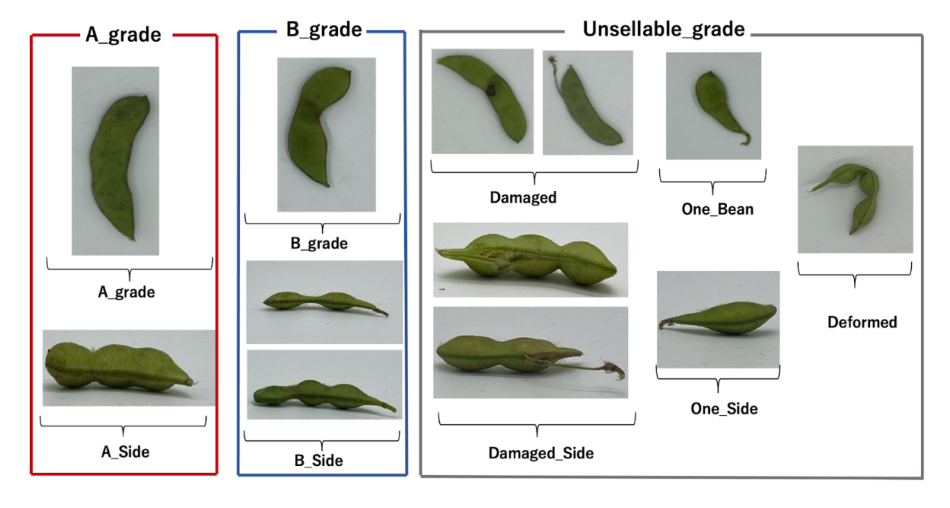

In [27]:
#In Japanese agriculture, green soybeans are graded according to Cooperative standards.
# This sorting task is still done manually, which leads to labor shortages and overwork.
# In this study, we focused on the automation of the grading tasks using AI.
# This research proposed a method for collecting images of green soybeans from top and side angles.
#Using the custom dataset, we enhanced AI model performance, achieving a grading accuracy of 93%, which exceeds previous studies.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ItqQJXBiRq7WFCvhGGeL")
project = rf.workspace("firstpro").project("edamame_pro-ofln8")
dataset = project.version(4).download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Edamame_pro-4 in yolov8:: 100%|██████████| 13958/13958 [00:01<00:00, 7410.68it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/home/Edamame_pro-4/data.yaml epochs=150 imgsz=640 plots=True save = True

/content
100% 21.5M/21.5M [00:00<00:00, 385MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Edamame_pro-4/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [ ]:
!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml
save = True

2024-01-09 06:47:47.344357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 06:47:47.344427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 06:47:47.346011: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 06:47:48.411058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Edamame_pro-4/valid/labels.c

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Define path to video file
source = '/content/new_output_video.mp4'

# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 save=True source = /content/images

2024-01-09 06:30:43.422889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 06:30:43.422962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 06:30:43.424676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 06:30:44.477453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
image 1/1026 /content/images/IMG_0019_jpg.rf.978a824b8127494

In [ ]:
!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train/weights/best.pt \
data= '/content/datasets/Edamame_pro-7/data.yaml'
save = True

2024-01-09 07:13:08.280668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 07:13:08.280755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 07:13:08.282318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 07:13:09.344642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Edamame_pro-7/test/labels...

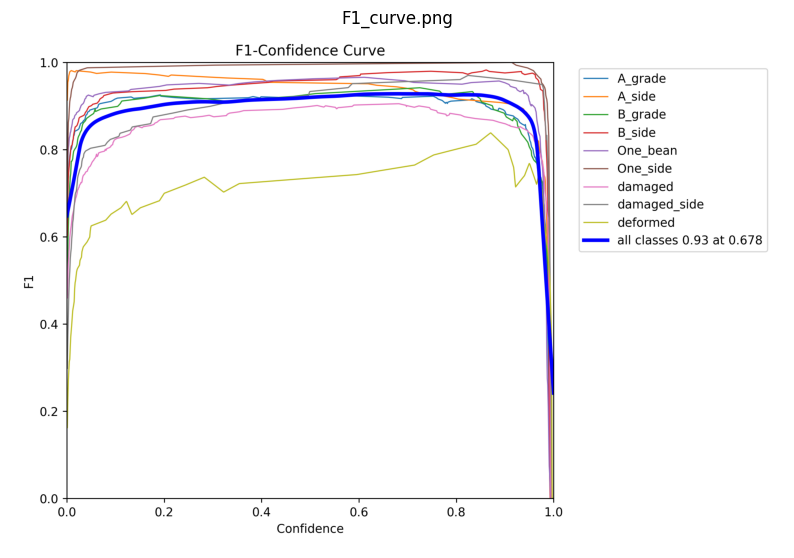

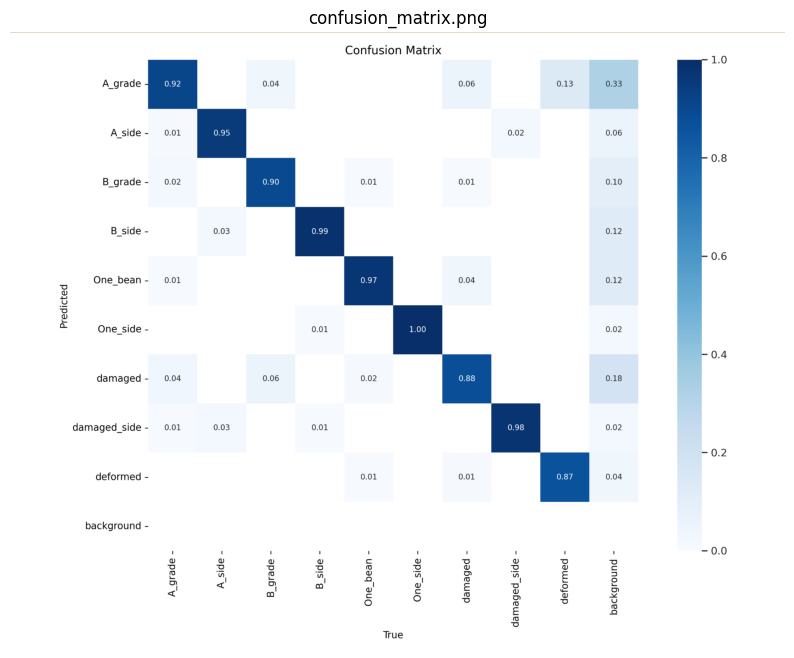

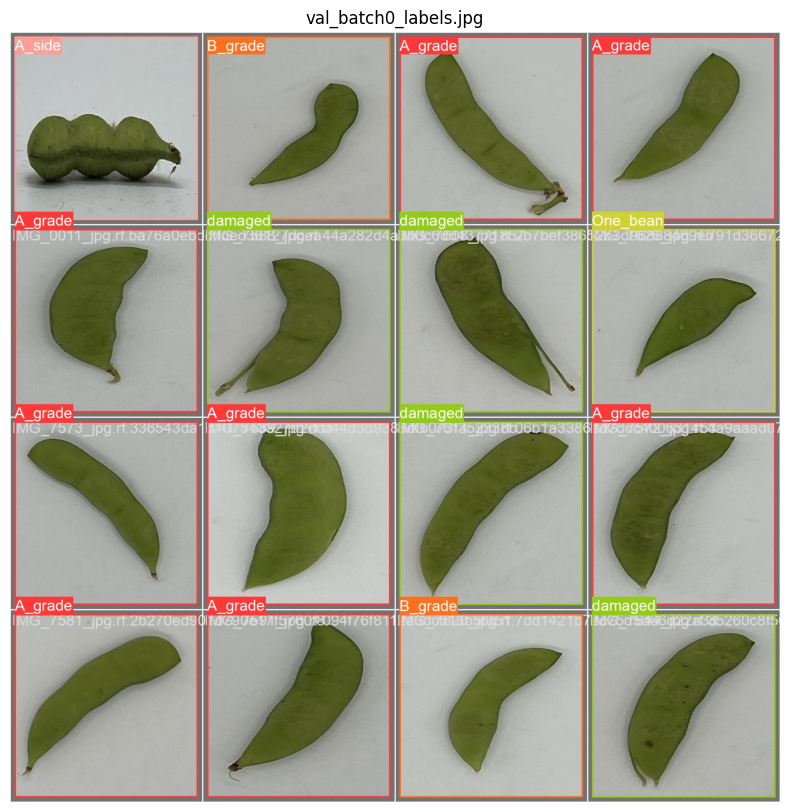

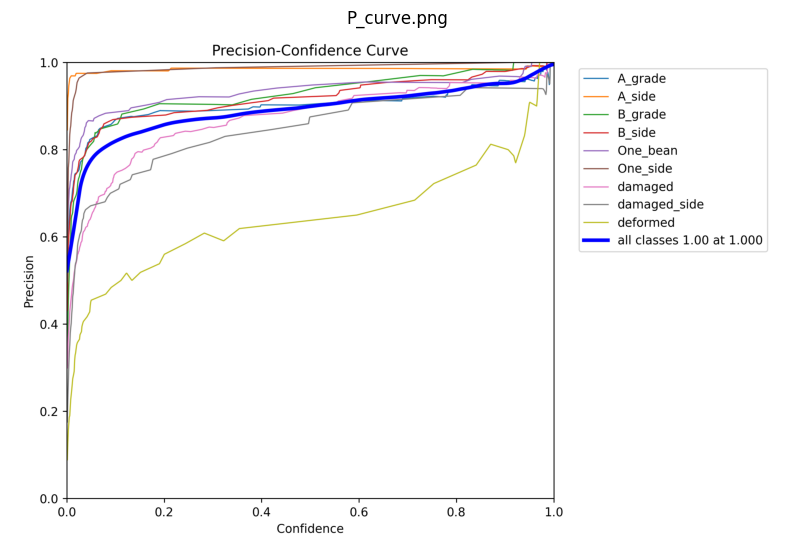

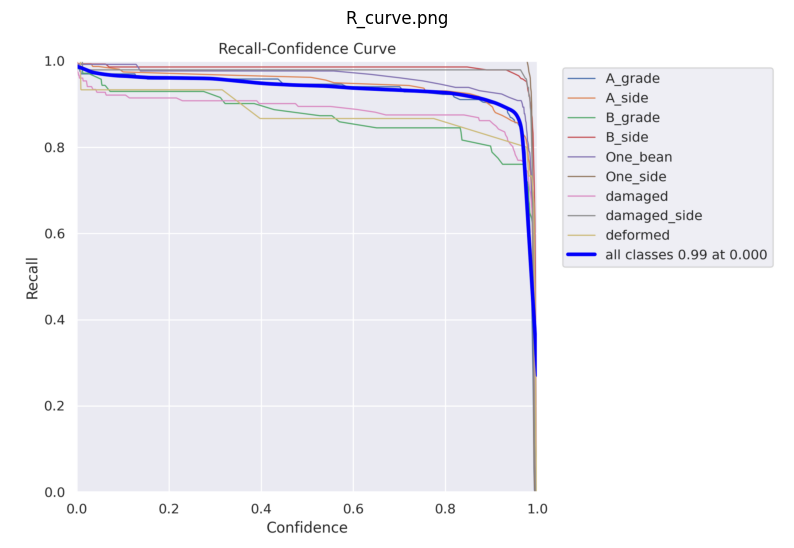

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the folder
folder_path = "/content/runs/detect/val"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Display each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    # Open the image
    try:
        image = Image.open(image_path)

        # Create a figure with a specified size
        plt.figure(figsize=(10, 10))  # You can adjust the size (width, height) as needed
        plt.imshow(image)
        plt.title(image_file)  # Set the title to the image file name
        plt.axis('off')  # Hide the axis
        plt.show()

    except Exception as e:
        print(f"Error opening image {image_file}: {e}")
